In [1]:
suppressPackageStartupMessages(library(ArchR))
suppressPackageStartupMessages(library(ArchRNA))
suppressPackageStartupMessages(library(parallel))  
suppressPackageStartupMessages(library(Seurat))
suppressMessages(suppressPackageStartupMessages(library(SeuratData)))

suppressMessages(suppressWarnings(addArchRGenome("hg19")))

Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning me

In [2]:
suppressWarnings(SeuratData::InstallData("ifnb"))
suppressWarnings(SeuratData::LoadData("ifnb"))

An object of class Seurat 
14053 features across 13999 samples within 1 assay 
Active assay: RNA (14053 features, 0 variable features)

In [3]:
mat <- Seurat::GetAssayData(ifnb, slot="counts")
colnames(mat) <- paste0(ifnb$stim, "#", colnames(mat))
rownames(ifnb@meta.data) <- colnames(mat)

In [4]:
proj <- suppressMessages(suppressWarnings(ArchRNA::Matrix2ArchRProject(mat=mat, name=c("CTRL", "STIM"), meta.data = ifnb@meta.data,outputDirectory = "ifnb", addHashtag = F)))

In [5]:
proj <- suppressWarnings(addDoubletScores_(proj, verbose=F))

ArchR logging to : ArchRLogs/ArchR-addDoubletScores-3ccd746f8e914d-Date-2022-11-04_Time-22-32-55.log
If there is an issue, please report to github with logFile!

2022-11-04 22:32:55 : Batch Execution w/ safelapply!, 0 mins elapsed.

STIM (1 of 2) : UMAP Projection R^2 = 0.99763

STIM (1 of 2) : UMAP Projection R^2 = 0.99763

Biased Clusters : 
Cluster9 


CTRL (2 of 2) : UMAP Projection R^2 = 0.99615

CTRL (2 of 2) : UMAP Projection R^2 = 0.99615

ArchR logging successful to : ArchRLogs/ArchR-addDoubletScores-3ccd746f8e914d-Date-2022-11-04_Time-22-32-55.log



In [6]:
xfun::embed_file("ifnb/CTRL/CTRL-Doublet-Summary.pdf")
xfun::embed_file("ifnb/STIM//STIM-Doublet-Summary.pdf")

Shiny tags cannot be represented in plain text (need html)

Shiny tags cannot be represented in plain text (need html)

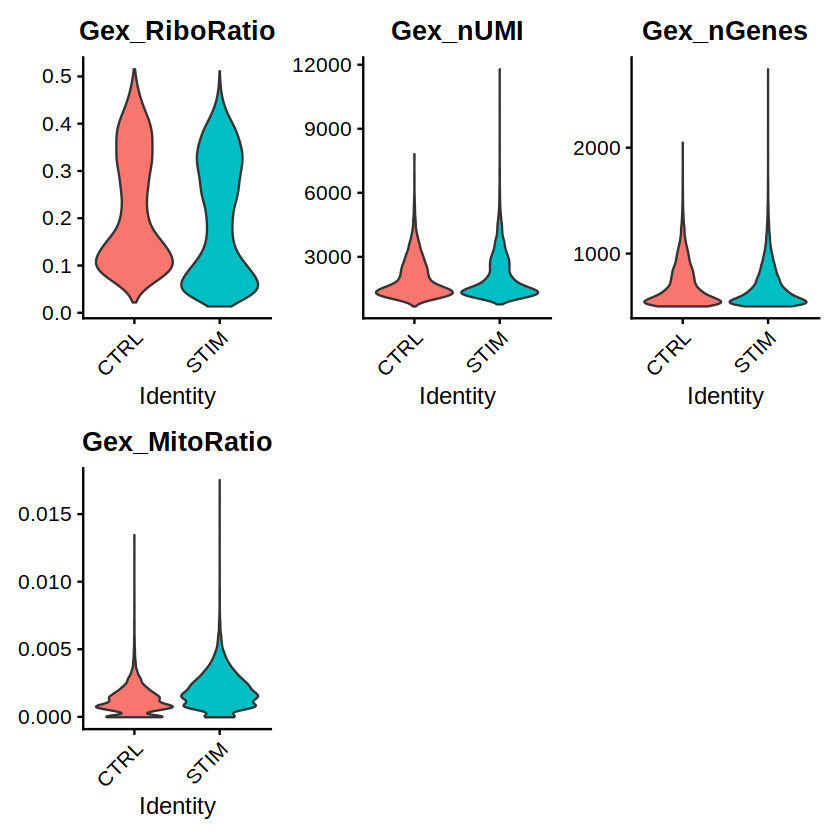

In [7]:
VlnPlotS(proj, features=c('Gex_RiboRatio', 'Gex_nUMI', 'Gex_nGenes', 'Gex_MitoRatio'), group.by="Sample", pt.size=0)

In [8]:
# cellcycling
proj <- suppressMessages(Cellcycling(proj))

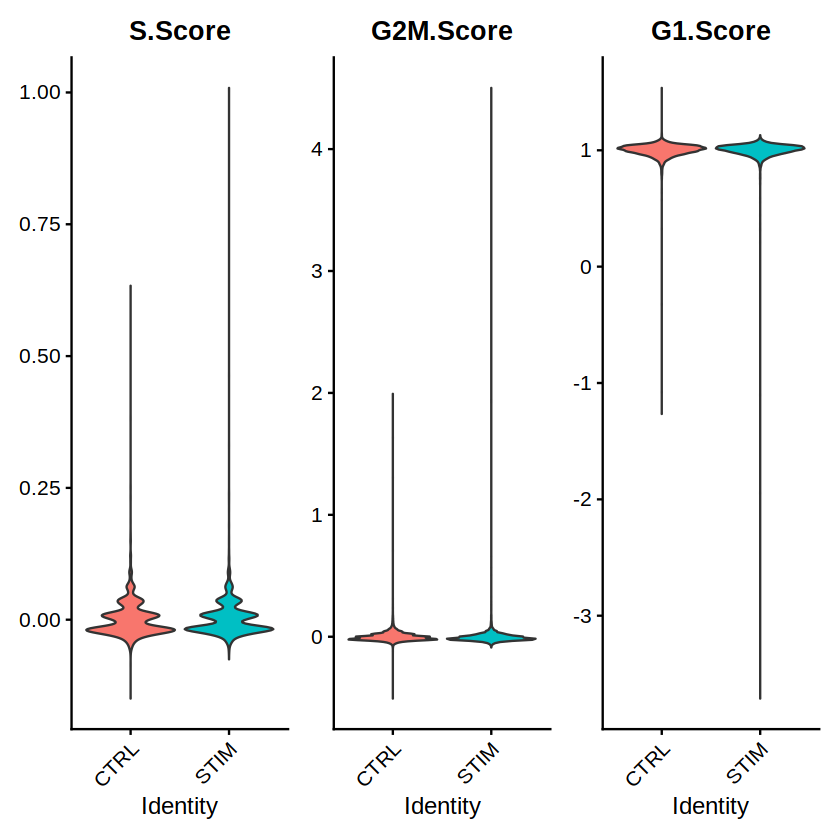

In [9]:
VlnPlotS(proj, features=c('S.Score', 'G2M.Score', 'G1.Score'), group.by="Sample", pt.size=0)

In [10]:
proj <- suppressMessages(addRNAIterativeLSI(proj))

Warning message in if (grepl("log", units, ignore.case = TRUE)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (units %in% "BinarizedCounts") {:
“the condition has length > 1 and only the first element will be used”


In [11]:
proj <- addHarmony(proj, reducedDims = "RNAIterativeLSI", groupBy = "Sample")

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony converged after 4 iterations



In [12]:
proj <- addUMAP(proj, reducedDims = "Harmony", verbose = F, force = T) 

22:38:28 Creating temp model dir /tmp/Rtmp8xB63q/dir3ccd743b20368b

22:38:28 Creating dir /tmp/Rtmp8xB63q/dir3ccd743b20368b

22:38:29 Changing to /tmp/Rtmp8xB63q/dir3ccd743b20368b

22:38:29 Creating /data/sz753404/git_code/ArchRNA/vignettes/ifnb/Embeddings/Save-Uwot-UMAP-Params-Harmony-3ccd742da2e7c4-Date-2022-11-04_Time-22-38-28.tar



In [13]:
proj <- suppressMessages(addBatchClusters(proj, resolutions=seq(0.4, 0.8, by=0.1), cluster_prefix='Cluster_', reducedDims = "Harmony", biasCol = "Gex_nUMI"))

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 13999
Number of edges: 501223

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9163
Number of communities: 11
Elapsed time: 1 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 13999
Number of edges: 501223

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9026
Number of communities: 13
Elapsed time: 2 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 13999
Number of edges: 501223

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8901
Number of communities: 14
Elapsed time: 1 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 13999
Number of edges: 501223

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8802
Number of communities: 14
Elapsed time: 1 seconds
Modularity O

Warning message:
“The `add` argument of `group_by()` is deprecated as of dplyr 1.0.0.
Please use the `.add` argument instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”


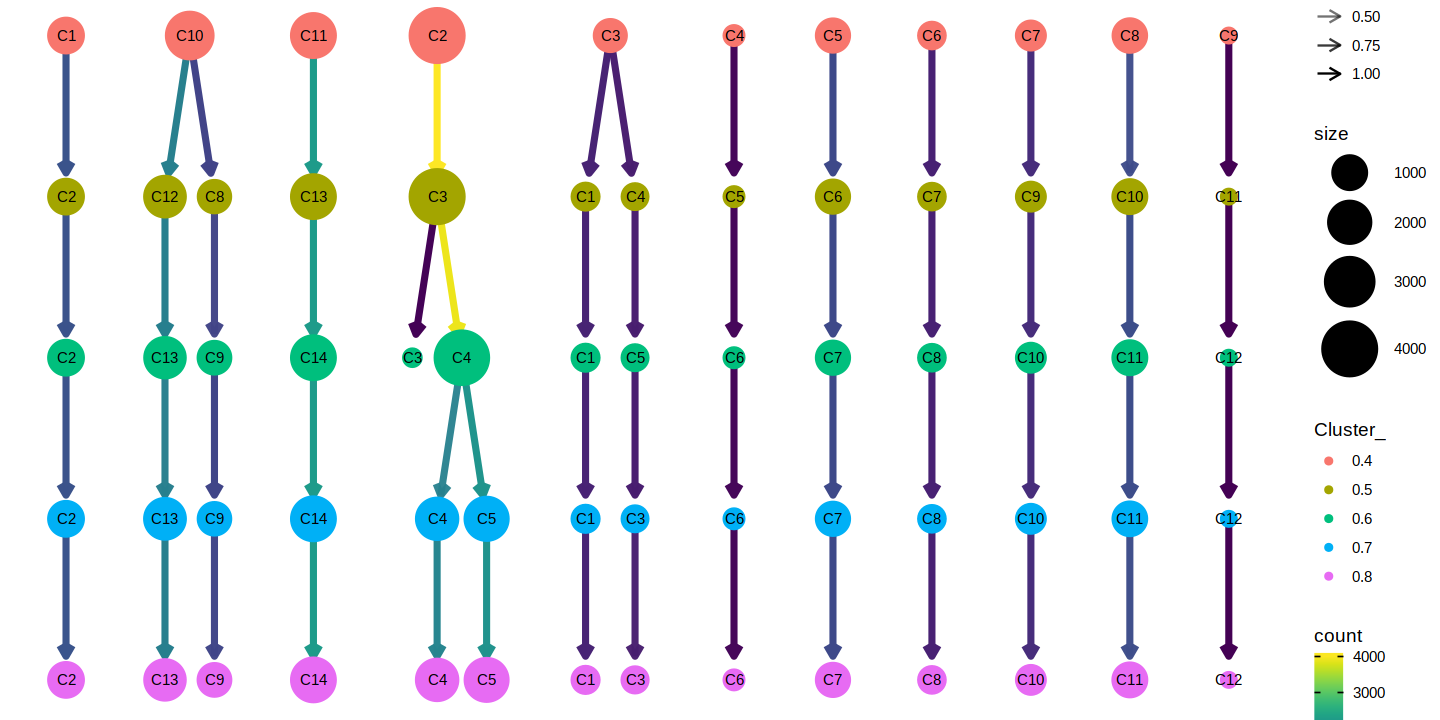

In [14]:
options(repr.plot.width = 12, repr.plot.height = 6)
suppressMessages(clustreeS(proj, prefix = "Cluster_"))

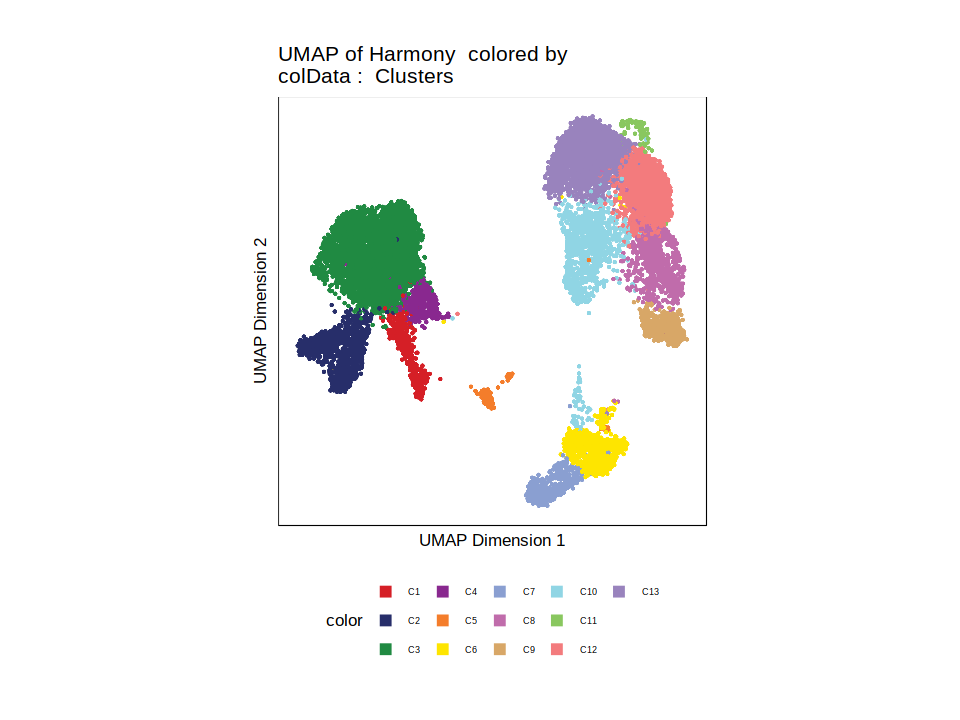

In [15]:
options(repr.plot.width = 8, repr.plot.height = 6)
##ArchR styple plots
proj$Clusters <- proj$Cluster_0.5
p1 <- suppressMessages(plotEmbedding(proj, name = "Clusters", embedding = "UMAP", size = 1.5, labelAsFactors=F, labelMeans=F))
p1

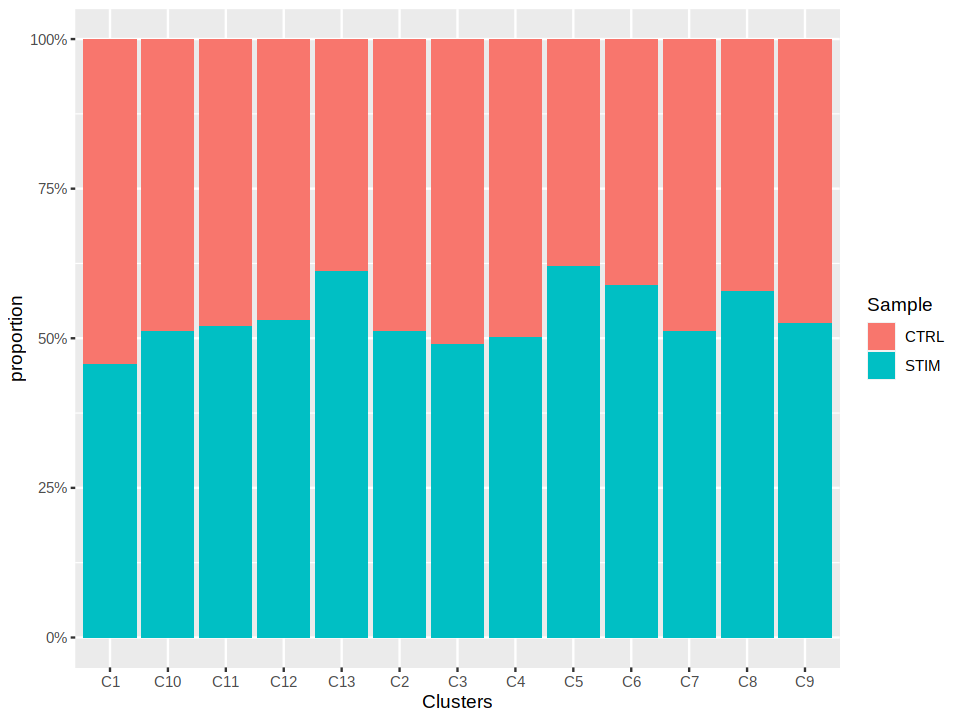

In [16]:
suppressMessages(PropBarPlotS(proj, Cluster="Clusters"))

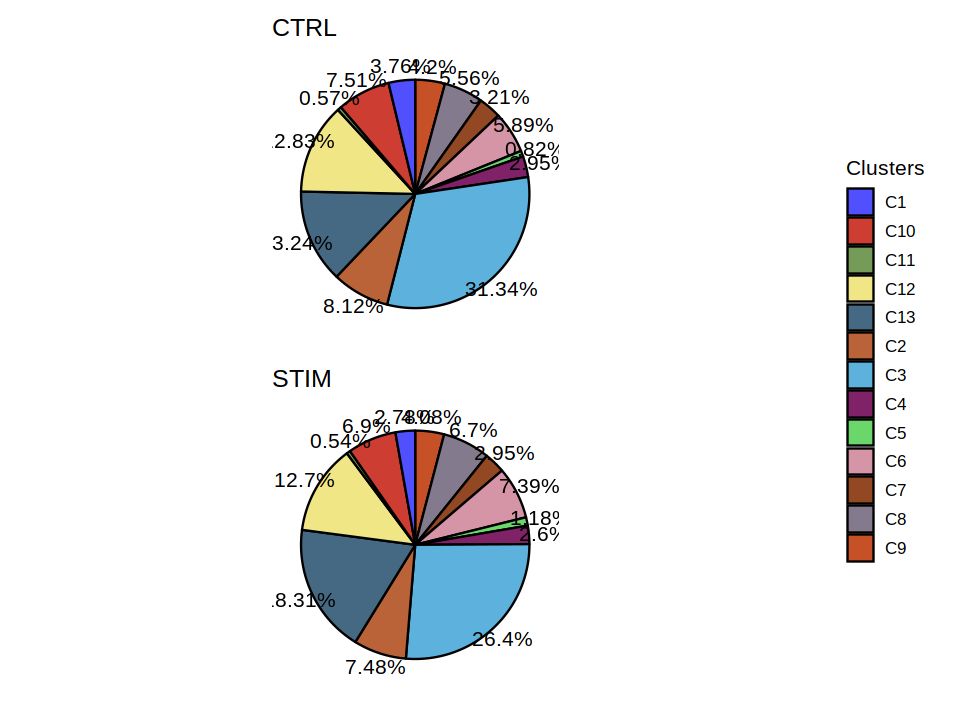

In [17]:
PiePlotS(proj, Cluster="Clusters", condition="Sample")

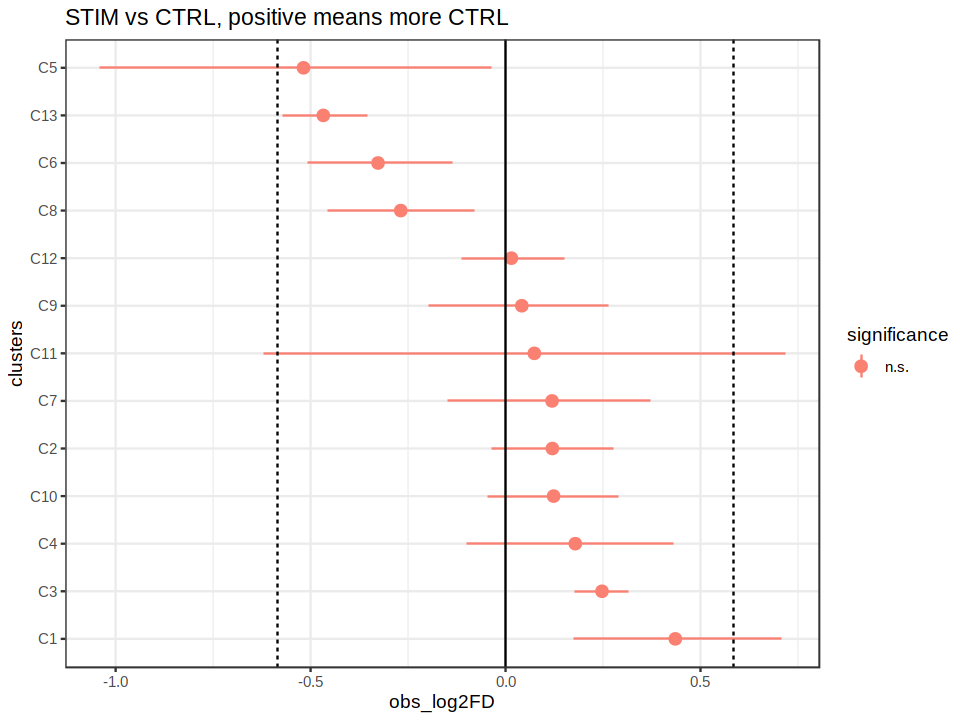

In [18]:
suppressMessages(scProportionPlotS(proj,condition="Sample", clusterName="Clusters", pair=c("STIM", "CTRL")))

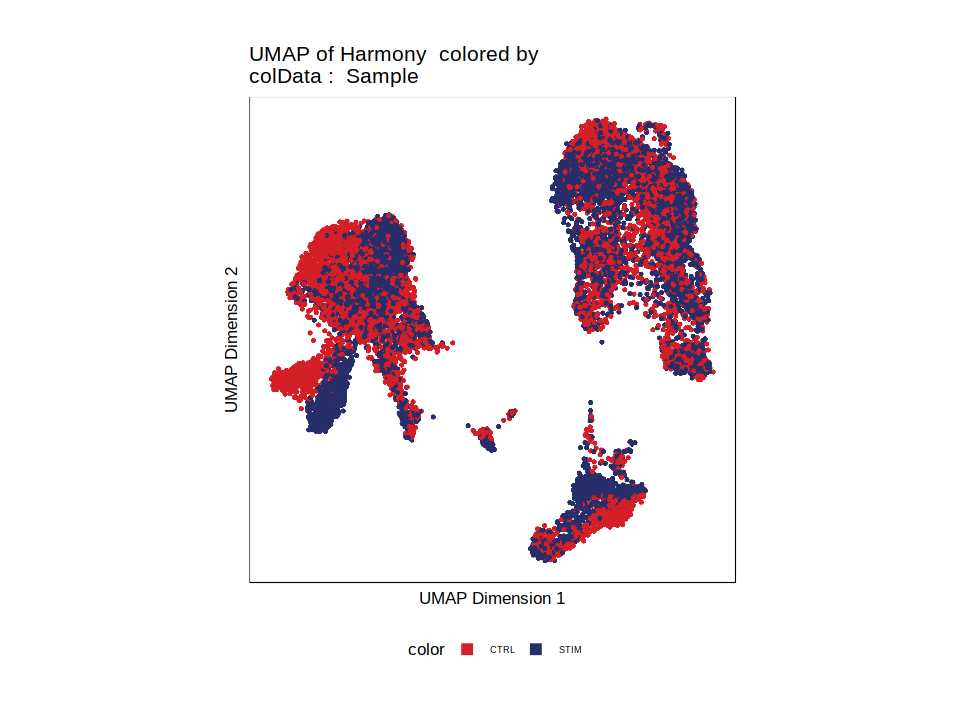

In [19]:
p2 <- suppressMessages(plotEmbedding(proj, name = "Sample", embedding = "UMAP", size = 1.5, labelAsFactors=F, labelMeans=F))
p2 

Warning message:
“No assay specified, setting assay as RNA by default.”


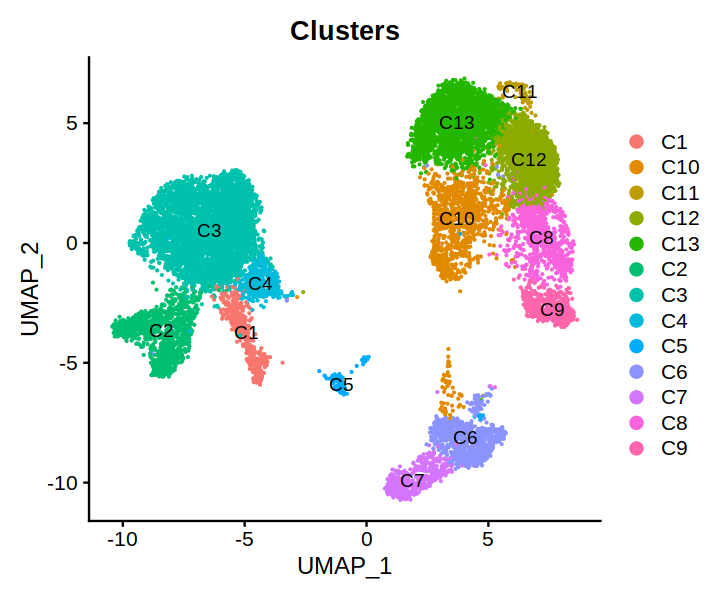

In [20]:
#Seurat style plots
options(repr.plot.width = 6, repr.plot.height = 5)
p3 <- DimPlotS(proj, group.by = "Clusters", reduction= "UMAP", label=T)
p3

Warning message in FeaturePlotS(proj, features = c("GNLY", "PPBP"), reduction = "UMAP", :
“useMatrix is NULL, use first matrix GeneExpressionMatrix!”
Warning message in PartialSeurat(project, useMatrix = useMatrix, assay = assay, :
“”
Warning message:
“No assay specified, setting assay as RNA by default.”


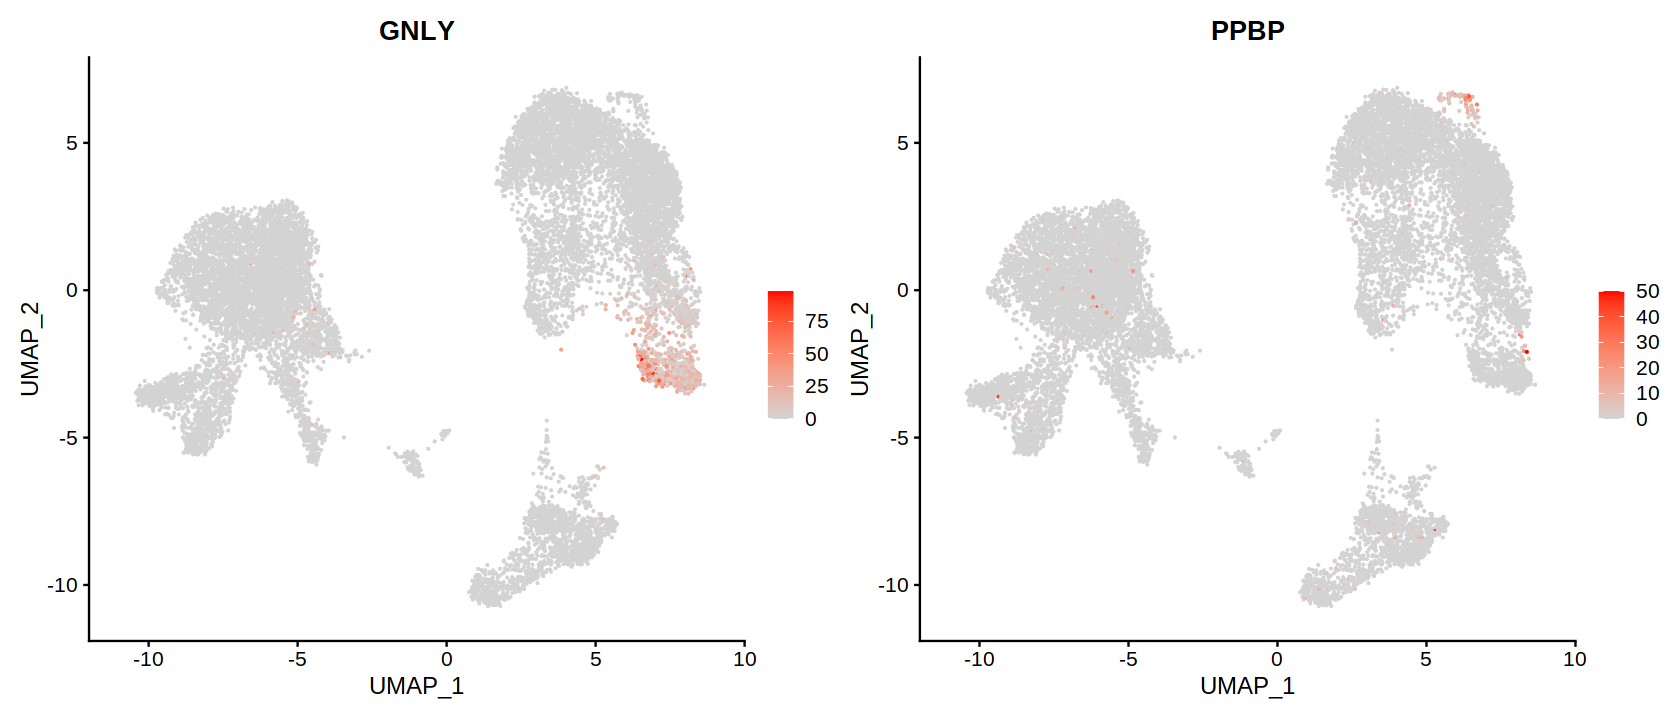

In [21]:
#Seurat style plots
options(repr.plot.width = 14, repr.plot.height = 6)
p4 <- suppressMessages(FeaturePlotS(proj, features=c("GNLY", "PPBP"), reduction= "UMAP", label=F, cols=c("lightgrey", "red")))
p4

Warning message in DoHeatmapS(proj, features = genes, group.by = "Clusters"):
“useMatrix is NULL, use first matrix GeneExpressionMatrix!”
Warning message in Seurat::DoHeatmap(object, assay = "RNA", slot = "scale.data", :
“The following features were omitted as they were not found in the scale.data slot for the RNA assay: PRG2, MPO”


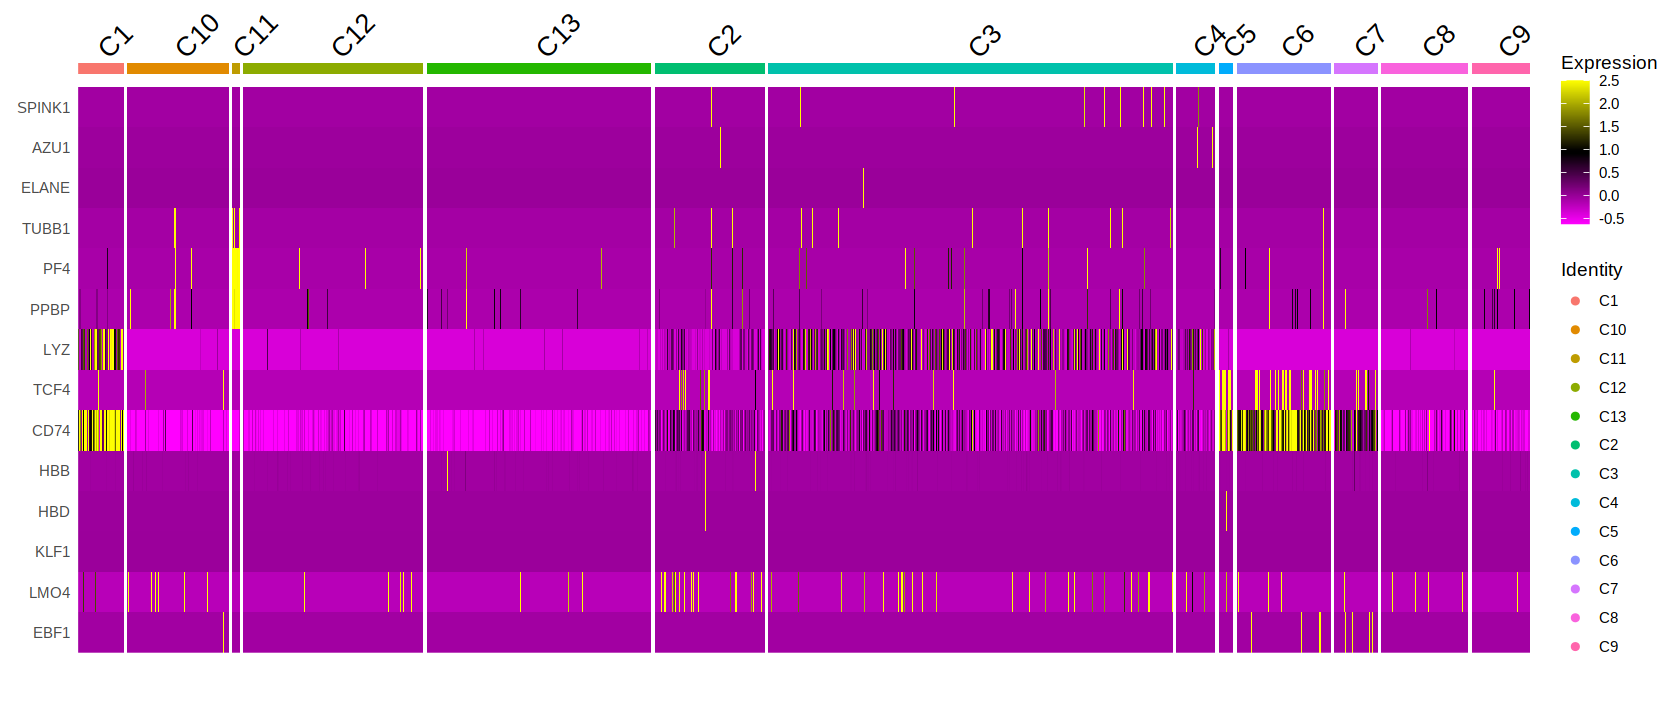

In [22]:
genes <- c("SPINK1", "AZU1", "MPO", "ELANE", "TUBB1", "PF4", "PPBP", "LYZ", "TCF4", "CD74", "HBB", "HBD", "KLF1", "PRG2", "LMO4", "EBF1")  
suppressMessages(DoHeatmapS(proj, features=genes, group.by="Clusters"))

In [23]:
##convert to seurat-object
seu <- suppressMessages(ArchRNA:::PartialSeurat(proj, embeddings = "UMAP", assay = "data"))

Warning message:
“No assay specified, setting assay as RNA by default.”


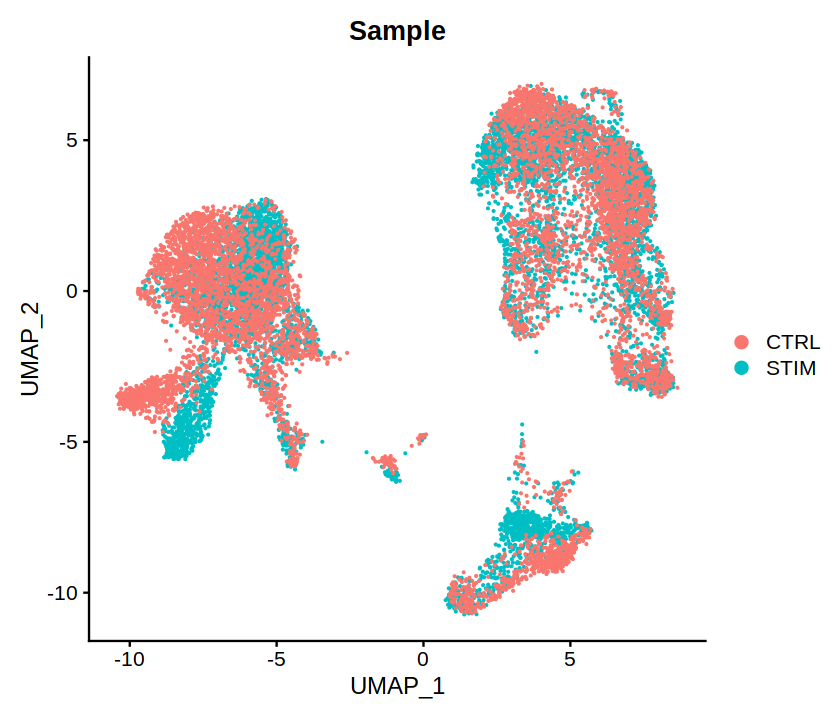

In [24]:
## Convert to Seurat Object
options(repr.plot.width = 7, repr.plot.height = 6)
Seurat::DimPlot(seu, reduction="UMAP", group.by="Sample")

In [25]:
sessionInfo()

R version 4.1.0 (2021-05-18)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Rocky Linux 8.6 (Green Obsidian)

Matrix products: default
BLAS/LAPACK: /data/sz753404/miniconda3/envs/schema/lib/libopenblasp-r0.3.17.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.utf-8    
 [5] LC_MONETARY=de_DE.UTF-8    LC_MESSAGES=en_US.utf-8   
 [7] LC_PAPER=de_DE.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=de_DE.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
 [1] grid      parallel  stats4    stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] clustree_0.4.4                    ggraph_2.0.5                     
 [3] harmony_0.1.0                     Rcpp_1.0.9                       
 [5] gridExtra_2.3                     nabor_0.5.0                      
 [7] BSgenome.Hsapiens.UCSC.hg19_